No class name found in XML: C:/Users/kaush/Downloads/HAIR_IMPLEMENTATION/annotation\curly\images127.xml
Skipping images127.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/HAIR_IMPLEMENTATION/annotation\curly\images136.xml
Skipping images136.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/HAIR_IMPLEMENTATION/annotation\curly\images160.xml
Skipping images160.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/HAIR_IMPLEMENTATION/annotation\curly\images171.xml
Skipping images171.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/HAIR_IMPLEMENTATION/annotation\curly\images176.xml
Skipping images176.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/HAIR_IMPLEMENTATION/annotation\curly\images206.xml
Skipping images206.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/HAIR_IMPLEMENTATI

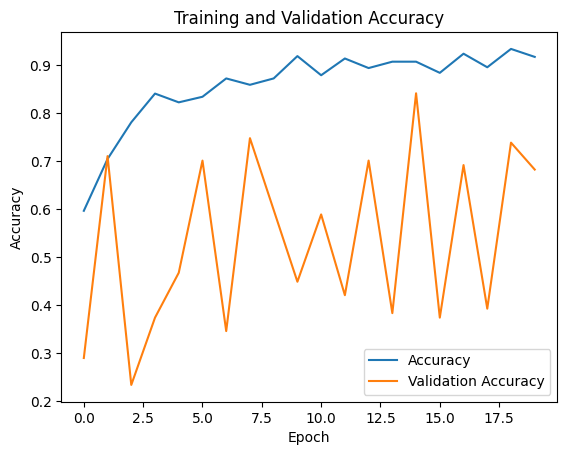

23/23 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step


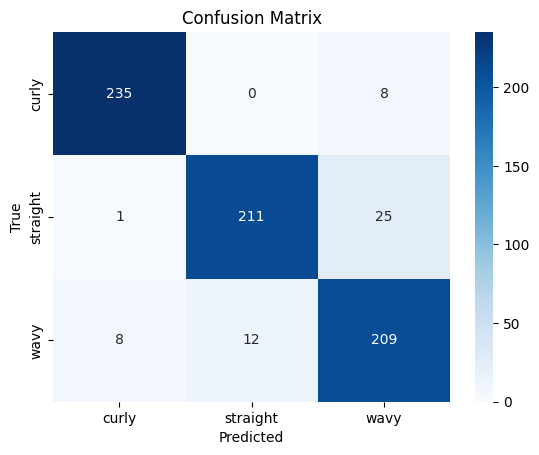

              precision    recall  f1-score   support

       curly       0.96      0.97      0.97       243
    straight       0.95      0.89      0.92       237
        wavy       0.86      0.91      0.89       229

    accuracy                           0.92       709
   macro avg       0.92      0.92      0.92       709
weighted avg       0.93      0.92      0.92       709



In [2]:
import os
import tensorflow as tf
import numpy as np
import xml.etree.ElementTree as ET
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Function to parse XML file and extract the class label
def parse_xml(xml_file):
    try:
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for obj in root.findall('object'):
            class_name = obj.find('name').text
            if class_name:
                return class_name
        print(f"No class name found in XML: {xml_file}")
        return None
    except Exception as e:
        print(f"Error parsing XML {xml_file}: {e}")
        return None

# Function to load data (images and corresponding labels)
def load_data(image_dir, xml_dir, class_names):
    images = []
    labels = []
    for class_name in class_names:
        class_folder = os.path.join(image_dir, class_name)
        xml_folder = os.path.join(xml_dir, class_name)
        for img_file in os.listdir(class_folder):
            if img_file.endswith(".jpg"):
                img_path = os.path.join(class_folder, img_file)
                xml_file = os.path.join(xml_folder, img_file.replace(".jpg", ".xml"))
                class_label = parse_xml(xml_file)
                
                if class_label is None:
                    print(f"Skipping {img_file} due to missing class label.")
                    continue
                
                if class_label in class_names:
                    images.append(img_path)
                    labels.append(class_names.index(class_label))
                else:
                    print(f"Warning: {class_label} is not a valid class.")
    return images, labels

# Function to preprocess the images
def preprocess_images(image_paths, labels, img_size=(224, 224)):  # DenseNet121 requires 224x224 input size
    images = []
    for img_path in image_paths:
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
        img = tf.keras.preprocessing.image.img_to_array(img)
        images.append(img)
    images = np.array(images) / 255.0
    labels = np.array(labels)
    return images, labels

# Load data
class_names = ["curly", "straight", "wavy"]
image_dir = "C:/Users/kaush/Downloads/HAIR_IMPLEMENTATION/hair dataset/training"
xml_dir = "C:/Users/kaush/Downloads/HAIR_IMPLEMENTATION/annotation"
image_paths, labels = load_data(image_dir, xml_dir, class_names)
images, labels = preprocess_images(image_paths, labels)

# Load the DenseNet121 model (pre-trained on ImageNet) without the top layers
base_model = tf.keras.applications.DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

# Create a new model with custom layers on top of DenseNet121
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),  # Adjust dropout rate if needed
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Add EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(images, labels, epochs=50, validation_split=0.15, batch_size=32, callbacks=[early_stopping])

# Plot the accuracy and loss
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Predict on the images to generate a classification report
predictions = model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(labels, predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(labels, predicted_labels, target_names=class_names)
print(report)


In [3]:
# Save the model to a file
model.save("anndensenet121_best_model.h5")


No class name found in XML: C:/Users/kaush/Downloads/HAIR_IMPLEMENTATION/annotation\curly\images127.xml
Skipping images127.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/HAIR_IMPLEMENTATION/annotation\curly\images136.xml
Skipping images136.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/HAIR_IMPLEMENTATION/annotation\curly\images160.xml
Skipping images160.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/HAIR_IMPLEMENTATION/annotation\curly\images171.xml
Skipping images171.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/HAIR_IMPLEMENTATION/annotation\curly\images176.xml
Skipping images176.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/HAIR_IMPLEMENTATION/annotation\curly\images206.xml
Skipping images206.jpg due to missing class label.
No class name found in XML: C:/Users/kaush/Downloads/HAIR_IMPLEMENTATI

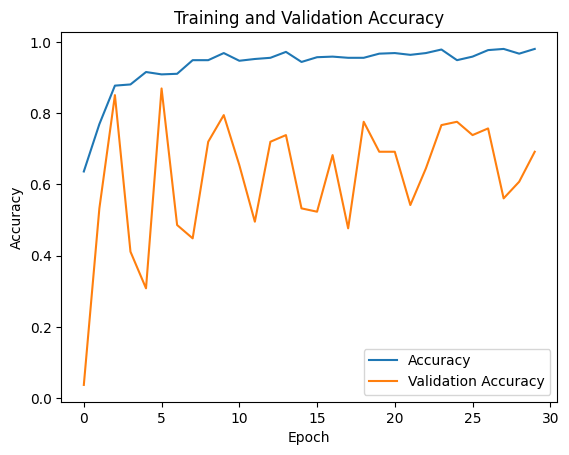

23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 601ms/step


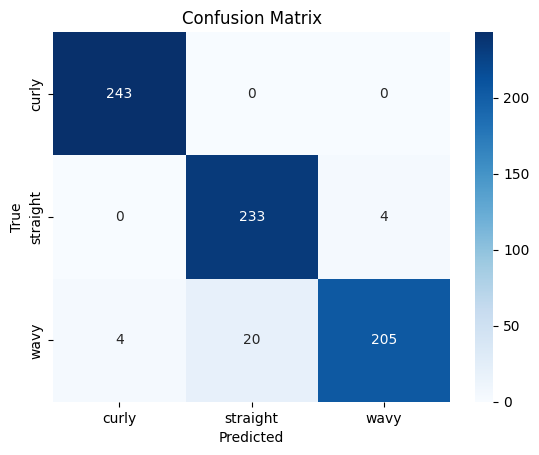

              precision    recall  f1-score   support

       curly       0.98      1.00      0.99       243
    straight       0.92      0.98      0.95       237
        wavy       0.98      0.90      0.94       229

    accuracy                           0.96       709
   macro avg       0.96      0.96      0.96       709
weighted avg       0.96      0.96      0.96       709



In [4]:
import os
import tensorflow as tf
import numpy as np
import xml.etree.ElementTree as ET
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Function to parse XML file and extract the class label
def parse_xml(xml_file):
    try:
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for obj in root.findall('object'):
            class_name = obj.find('name').text
            if class_name:
                return class_name
        print(f"No class name found in XML: {xml_file}")
        return None
    except Exception as e:
        print(f"Error parsing XML {xml_file}: {e}")
        return None

# Function to load data (images and corresponding labels)
def load_data(image_dir, xml_dir, class_names):
    images = []
    labels = []
    for class_name in class_names:
        class_folder = os.path.join(image_dir, class_name)
        xml_folder = os.path.join(xml_dir, class_name)
        for img_file in os.listdir(class_folder):
            if img_file.endswith(".jpg"):
                img_path = os.path.join(class_folder, img_file)
                xml_file = os.path.join(xml_folder, img_file.replace(".jpg", ".xml"))
                class_label = parse_xml(xml_file)
                
                if class_label is None:
                    print(f"Skipping {img_file} due to missing class label.")
                    continue
                
                if class_label in class_names:
                    images.append(img_path)
                    labels.append(class_names.index(class_label))
                else:
                    print(f"Warning: {class_label} is not a valid class.")
    return images, labels

# Function to preprocess the images
def preprocess_images(image_paths, labels, img_size=(224, 224)):  # MobileNet requires 224x224 input size
    images = []
    for img_path in image_paths:
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
        img = tf.keras.preprocessing.image.img_to_array(img)
        images.append(img)
    images = np.array(images) / 255.0  # MobileNet needs images scaled to [0, 1]
    labels = np.array(labels)
    return images, labels

# Load data
class_names = ["curly", "straight", "wavy"]
image_dir = "C:/Users/kaush/Downloads/HAIR_IMPLEMENTATION/hair dataset/training"
xml_dir = "C:/Users/kaush/Downloads/HAIR_IMPLEMENTATION/annotation"
image_paths, labels = load_data(image_dir, xml_dir, class_names)
images, labels = preprocess_images(image_paths, labels)

# Load the MobileNet model (pre-trained on ImageNet) without the top layers
base_model = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

# Create a new model with custom layers on top of MobileNet
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),  # Adjust dropout rate if needed
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Add EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(images, labels, epochs=50, validation_split=0.15, batch_size=32, callbacks=[early_stopping])

# Plot the accuracy and loss
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Predict on the images to generate a classification report
predictions = model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(labels, predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(labels, predicted_labels, target_names=class_names)
print(report)


In [5]:
# Save the model to a file
model.save("MOBILENET_best_model.h5")